In [1]:
import geopandas as gpd
import os

In [2]:
data_directory = "data"

In [3]:
pipelines = gpd.read_file(f"{data_directory}\\pipelines_105.shp") 

In [4]:
pipelines.head() 

,pipe_id,pipeline_a,pipeline_d,pipeline_m,pipeline_z,pipeline_1,created,createdby,modified,modifiedby,pipeline_l,pipeline_c,modified_t,table_name,pipeline_2,pipeline_3,pipeline_4,geometry
0,105010386,"Rowshon Goly,Bagpara,South Rajarbagh",75,HDPE,1,105,None,None,None,None,29.345685,Reticulation Pipeline,None,Pipelines,None,89785,166,"LINESTRING (90.43940 23.73563, 90.43932 23.735..."
1,105010248,"Jora Mosjid Main Rd-1,South Rajarbagh",75,HDPE,1,105,None,None,None,None,19.600000,Reticulation Pipeline,None,Pipelines,None,89649,1288,"LINESTRING (90.44180 23.73583, 90.44180 23.735..."
2,105010253,"Basabo-Rajarbagh Main Rd,South Rajarbagh",315,HDPE,1,105,None,None,None,None,18.625808,Transmission Pipeline,None,Pipelines,None,89654,1836,"LINESTRING (90.43919 23.73728, 90.43904 23.737..."
3,105010207,"New Road,South Rajarbagh",250,HDPE,1,105,None,None,None,None,13.453152,Transmission Pipeline,None,Pipelines,None,89608,6395,"LINESTRING (90.43912 23.73664, 90.43910 23.736..."
4,105010492,"Bag Para Dorbar Rd-11,South Rajarbagh",110,HDPE,1,105,None,None,None,None,40.300000,Distribution Pipeline,None,Pipelines,None,89889,6629,"LINESTRING (90.43944 23.73503, 90.43933 23.735..."


In [5]:
#drop() method

In [6]:
pipelines.drop(
    columns = ['pipe_id', 'pipeline_z', 'pipeline_1', 'created', 'createdby', 'modified', 'modifiedby', 'modified_t', 'table_name', 'pipeline_2', 'pipeline_3', 'pipeline_4'],
    inplace= True
)

In [7]:
#rename() method

In [8]:
pipelines.rename(
    columns= {
        'pipeline_a': 'location',
        'pipeline_d': 'diameter (mm)',
        'pipeline_l': 'length (m)',
        'pipeline_c': 'category',
        'pipeline_m': 'material'
    },
    inplace= True
)

In [9]:
pipelines['category'].unique() 

array(['Reticulation Pipeline', 'Transmission Pipeline',
       'Distribution Pipeline'], dtype=object)

In [10]:
pipelines.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   location       799 non-null    object  
 1   diameter (mm)  799 non-null    object  
 2   material       799 non-null    object  
 3   length (m)     799 non-null    float64 
 4   category       799 non-null    object  
 5   geometry       799 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 37.6+ KB


In [11]:
#filtering geodataframes

#gdf1 = gdf[ gdf['attribute_name'] == 'value' ]

In [12]:
distribution_pipelines = pipelines[ pipelines['category'] == 'Distribution Pipeline' ]

In [13]:
distribution_pipelines.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 361 entries, 4 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   location       361 non-null    object  
 1   diameter (mm)  361 non-null    object  
 2   material       361 non-null    object  
 3   length (m)     361 non-null    float64 
 4   category       361 non-null    object  
 5   geometry       361 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 19.7+ KB


<AxesSubplot:>

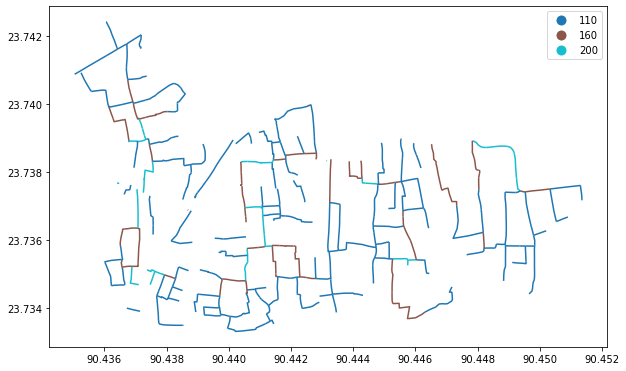

In [14]:
distribution_pipelines.plot(figsize=(10,10), column = 'diameter (mm)', legend = True)

In [15]:
dual_pipeline = pipelines[ (pipelines['category'] == 'Distribution Pipeline') |  (pipelines['category'] == 'Reticulation Pipeline')]

In [16]:
dual_pipeline.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 631 entries, 0 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   location       631 non-null    object  
 1   diameter (mm)  631 non-null    object  
 2   material       631 non-null    object  
 3   length (m)     631 non-null    float64 
 4   category       631 non-null    object  
 5   geometry       631 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 34.5+ KB


<AxesSubplot:>

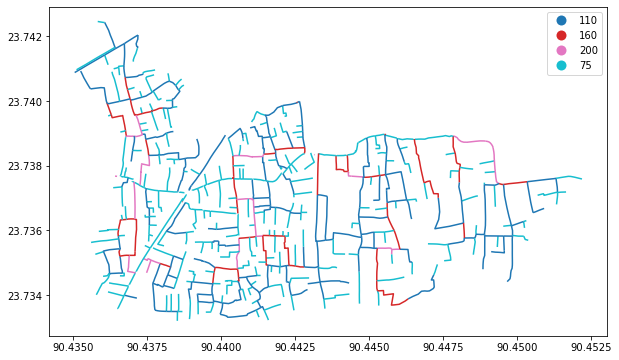

In [17]:
dual_pipeline.plot(figsize=(10,10), column = 'diameter (mm)', legend = True)

In [18]:
# and -> &
# or -> |

In [19]:
#isin() method 
#within the isin method, you have to give a list

In [20]:
pipelines['diameter (mm)'].unique() 

array(['75', '315', '250', '110', '355', '200', '160', '400'],
      dtype=object)

In [21]:
pipelines_range = pipelines[
    pipelines['diameter (mm)'].isin(['75', '110', '200'])
]

<AxesSubplot:>

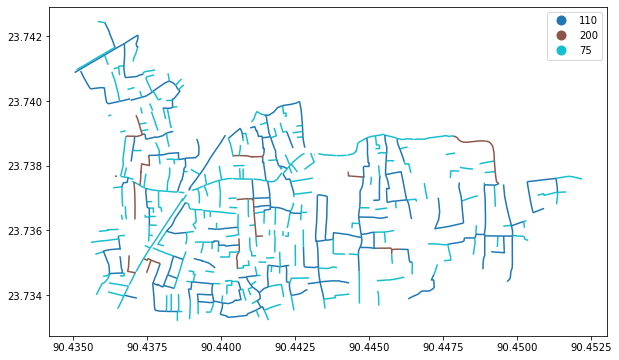

In [22]:
pipelines_range.plot(figsize=(10,10), column = 'diameter (mm)', legend = True)

In [23]:
pipelines_range.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 550 entries, 0 to 798
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   location       550 non-null    object  
 1   diameter (mm)  550 non-null    object  
 2   material       550 non-null    object  
 3   length (m)     550 non-null    float64 
 4   category       550 non-null    object  
 5   geometry       550 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 30.1+ KB


In [24]:
#reverse filtering (~)

In [25]:
pipelines_range2 = pipelines[~
    pipelines['diameter (mm)'].isin(['75', '110', '200'])
]

<AxesSubplot:>

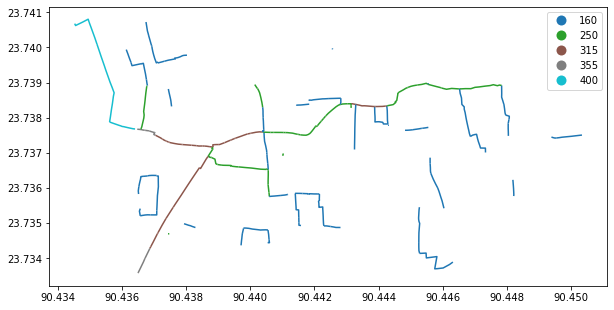

In [26]:
pipelines_range2.plot(figsize=(10,10), column = 'diameter (mm)', legend = True) 

In [27]:
#writing data to outputs

In [28]:
output_directory = r"E:\OneDrive - VEI\GIS Programming Course_working\geopandas\output"

In [29]:
distribution_pipelines.to_file(f"{output_directory}\\distribution_pipelines.shp")  

<ipython-input-29-665221e9fb9c>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  distribution_pipelines.to_file(f"{output_directory}\\distribution_pipelines.shp")


In [30]:
distribution_pipelines.to_file(f"{output_directory}\\distribution_pipelines.geojson")   

In [31]:
distribution_pipelines.to_csv(f"{output_directory}\\distribution_pipelines.csv") 

In [32]:
pipelines_range.to_json() 

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"location": "Rowshon Goly,Bagpara,South Rajarbagh", "diameter (mm)": "75", "material": "HDPE", "length (m)": 29.345685, "category": "Reticulation Pipeline"}, "geometry": {"type": "LineString", "coordinates": [[90.4393951, 23.7356344], [90.4393222, 23.7356372], [90.4392191, 23.7356355], [90.4391272, 23.7356335], [90.4391076, 23.7356329]]}}, {"id": "1", "type": "Feature", "properties": {"location": "Jora Mosjid Main Rd-1,South Rajarbagh", "diameter (mm)": "75", "material": "HDPE", "length (m)": 19.6, "category": "Reticulation Pipeline"}, "geometry": {"type": "LineString", "coordinates": [[90.441797, 23.7358292], [90.4417969, 23.735904], [90.4417956, 23.7359917], [90.4417956, 23.7360061]]}}, {"id": "4", "type": "Feature", "properties": {"location": "Bag Para Dorbar Rd-11,South Rajarbagh", "diameter (mm)": "110", "material": "HDPE", "length (m)": 40.3, "category": "Distribution Pipeline"}, "geometry":

In [36]:
pipelines.to_file(f"{data_directory}\\pipelines_105.geojson")  